# Import dataset

In [20]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# Get column names
columns = df_train.columns
columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [7]:
# Examples
df_train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,136,80,10400,7,6,1970,1970,1682,0,1682,...,7,1,2,530,0,0,0,0,0,174000
1,1453,35,3675,5,5,2005,2005,1072,0,1072,...,5,0,2,525,28,0,0,0,0,145000
2,763,72,8640,7,5,2009,2009,764,783,1547,...,7,0,2,614,45,0,0,0,0,215200
3,933,84,11670,9,5,2006,2006,1905,0,1905,...,8,1,3,788,191,0,0,0,0,320000
4,436,43,10667,7,6,1996,1996,827,834,1661,...,6,1,2,550,61,0,0,0,0,212000


In [8]:
# Describe
df_train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,732.338552,70.305284,10745.437378,6.128180,5.564579,1970.995108,1984.757339,1169.737769,353.738748,1529.242661,...,6.545010,0.613503,1.783757,477.120352,49.525440,21.303327,3.881605,15.565558,2.743640,181312.692759
std,425.860402,23.036078,11329.753423,1.371391,1.110557,30.748816,20.747109,389.550515,441.124963,530.971805,...,1.630221,0.650724,0.730751,208.443296,69.205968,61.534380,32.547722,56.445749,39.671531,77617.461005
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,334.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,367.500000,60.000000,7564.250000,5.000000,5.000000,1953.000000,1966.000000,889.750000,0.000000,1142.500000,...,5.000000,0.000000,1.000000,350.500000,0.000000,0.000000,0.000000,0.000000,0.000000,130000.000000
50%,735.500000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,1096.500000,0.000000,1476.500000,...,6.000000,1.000000,2.000000,484.000000,27.000000,0.000000,0.000000,0.000000,0.000000,165000.000000
75%,1100.500000,79.000000,11692.500000,7.000000,6.000000,2001.000000,2004.000000,1392.000000,731.250000,1794.250000,...,7.000000,1.000000,2.000000,576.000000,73.000000,0.000000,0.000000,0.000000,0.000000,215000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,2065.000000,5642.000000,...,14.000000,3.000000,4.000000,1418.000000,547.000000,552.000000,508.000000,480.000000,738.000000,745000.000000


## Linear Regression with One Variable

In [135]:
# Get Input, Output
X_train = df_train[['LotArea']]
y_train = df_train[['SalePrice']]

X_test = df_test[['LotArea']]
y_test = df_test[['SalePrice']]

In [136]:
# Convert to numpy
X_train = np.array(X_train.values,'float')
y_train = np.array(y_train.values,'float')

X_test = np.array(X_test.values,'float')
y_test = np.array(y_test.values,'float')

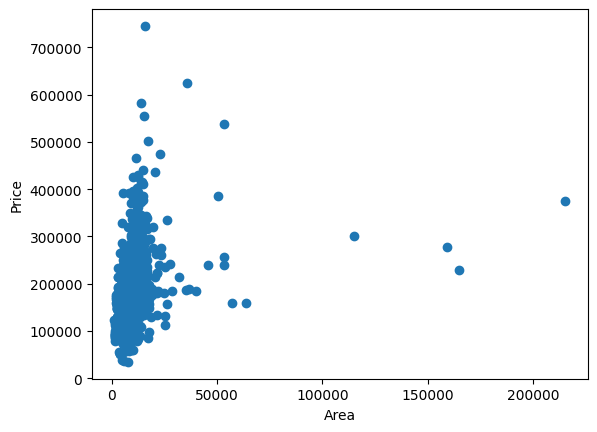

In [137]:
# Collaboration between Area and Price
plt.scatter(X_train, y_train)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [138]:
# Cost Function
def computecost(x,y,theta):
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    j = (a)*(b)
    return j

In [139]:
# Initial theta, x (x0=1, x1=x_train)
m = np.size(y_train)
x = np.hstack([np.ones_like(X_train),X_train])
theta = np.zeros([2,1])
print(theta,'\n',m)

[[0.]
 [0.]] 
 1022


In [140]:
# Gradient Descent
def gradient(x,y,theta):
    alpha = 0.00000000001
    iteration = 500#gradient descend algorithm
    J_history = np.zeros([iteration, 1])
    for iter in range(0,500):
        error = (x @ theta) -y
        temp0 = theta[0] - ((alpha/m) * np.sum(error*x[:,0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error*x[:,1]))
        theta = np.array([temp0,temp1]).reshape(2,1)
        J_history[iter] = (1 / (2*m) ) * (np.sum(((x @ theta)-y)**2))   #compute J value for each iteration 
    return theta, J_history

In [141]:
theta , J = gradient(x,y_train,theta)
print(theta)

[[1.57029052e-03]
 [1.68734585e+01]]


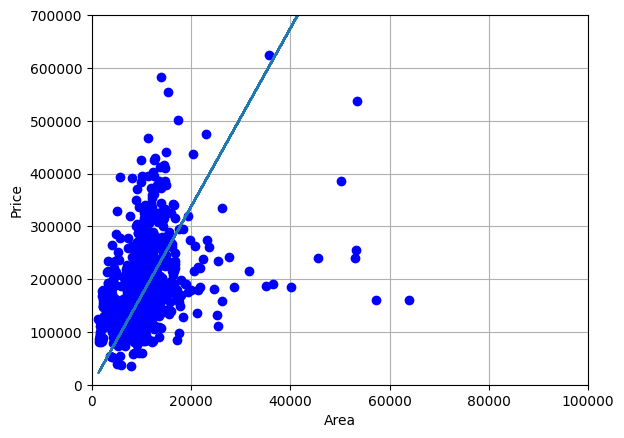

In [142]:
# Visualize
plt.plot(X_train,y_train,'bo')
plt.plot(X_train,x@theta,'-')
plt.axis([0,100000,0,700000])
plt.ylabel('Price')
plt.xlabel('Area')
plt.grid()
plt.show()

## Linear Regression with Multiple Input

In [143]:
# get Input, Output
X_train = df_train[columns[1:25]]
y_train = df_train[columns[25]]

X_test = df_test[columns[1:25]]
y_test = df_test[columns[25]]

In [144]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,80,10400,7,6,1970,1970,1682,0,1682,0,...,1,7,1,2,530,0,0,0,0,0
1,35,3675,5,5,2005,2005,1072,0,1072,1,...,1,5,0,2,525,28,0,0,0,0
2,72,8640,7,5,2009,2009,764,783,1547,0,...,1,7,0,2,614,45,0,0,0,0
3,84,11670,9,5,2006,2006,1905,0,1905,0,...,1,8,1,3,788,191,0,0,0,0
4,43,10667,7,6,1996,1996,827,834,1661,1,...,1,6,1,2,550,61,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,78,9317,6,5,2006,2006,1314,0,1314,0,...,1,6,1,2,440,22,0,0,0,0
1018,65,7804,4,3,1928,1950,1328,653,1981,1,...,1,7,2,2,576,44,0,0,0,0
1019,60,8172,5,7,1955,1990,864,0,864,1,...,1,5,0,2,572,0,0,0,0,0
1020,55,7642,7,8,1918,1998,912,514,1426,0,...,1,7,1,1,216,240,0,0,0,0


In [145]:
# Convert to numpy
X_train = np.array(X_train.values,'float')
y_train = np.array(y_train.values,'float')

X_test = np.array(X_test.values,'float')
y_test = np.array(y_test.values,'float')

In [146]:
print ("TRAINING SET")
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

print("TESTING SET")
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

TRAINING SET
X_train.shape:  (1022, 24)
y_train.shape:  (1022,)
TESTING SET
X_test.shape:  (438, 24)
y_test.shape:  (438,)


In [147]:
# Metrics to evaluate

def metrics(predictions, y_test):
    #calculating mean absolute error
    MAE = np.mean(np.abs(predictions-y_test))

    #calculating root mean square error
    MSE = np.square(np.subtract(y_test,predictions)).mean() 
    RMSE = math.sqrt(MSE)

    #calculating r_square
    rss = np.sum(np.square((y_test- predictions)))
    mean = np.mean(y_test)
    sst = np.sum(np.square(y_test-mean))
    r_square = 1 - (rss/sst)

    return MAE, RMSE, r_square

In [148]:
# Model
class LinearRegression:
    def __init__(self):
        # Initialize parameters
        self.bias = 0
        
        # Create an attribute to log the loss
        self.loss = []
        
    def fit(self, X, y, alpha = 0.05, n_iterations = 100):
        # Get num observations and num features
        self.n, self.m = X.shape
        
        # Create array of weights, one for each feature
        self.weights = np.ones(self.m)
        
        # Iterate a number of times
        for _ in range(n_iterations):
            
            # Generate prediction
            y_hat = np.dot(X, self.weights) + self.bias
            
            # Calculate error
            error = y - y_hat
            
            # Calculate loss (mse)
            mse = np.square(error).mean()
            
            # Log the loss
            self.loss.append(mse)

            # Calculate gradients using partial derivatives
            gradient_wrt_weights = - (1 / self.n) * np.dot(X.T, error)
            gradient_wrt_bias = - (1 / self.n) * np.sum(error)            
                
            # Update parameters using gradients and alpha    
            self.weights = self.weights - alpha * gradient_wrt_weights
            self.bias = self.bias - alpha * gradient_wrt_bias

    def predict(self, X):
        # Generate predictions using current weights and bias 
        return np.dot(X, self.weights) + self.bias

In [149]:
model = LinearRegression()
# Fit the model to the data
model.fit(X_train, y_train, alpha = 0.000000001, n_iterations = 1000)
# Make predictions
predictions = model.predict(X_test)

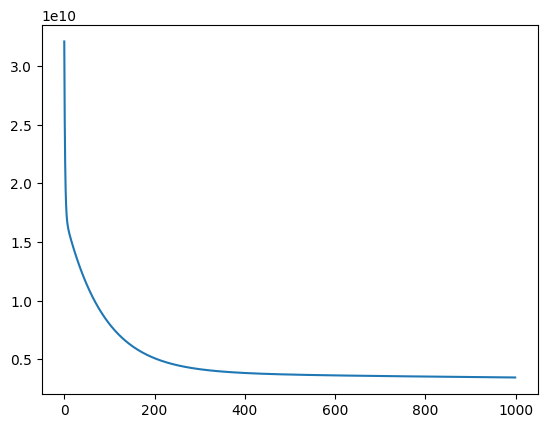

In [151]:
#Visualize loss
plt.plot(model.loss)
plt.show()

In [152]:
df_test['predict'] = predictions
df_test[['SalePrice', 'predict']]

,SalePrice,predict
0,154500,159140.227167
1,325000,239032.551155
2,115000,156685.334403
3,159000,180669.677916
4,315500,202345.872017
...,...,...
433,139000,158473.414088
434,126175,161525.926142
435,205950,185575.362821
436,110000,165509.442140


In [153]:
mae, rmse, r_square = metrics(predictions, y_test)
print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)
print("R square: ", r_square)

Mean Absolute Error:  42347.72532267557
Root Mean Square Error:  62283.78939339678
R square:  0.44407877651119076


## Normalize

In [154]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

In [155]:
# Min-max normalization
for i in range(X_train_norm.shape[1]):
    feat = X_train_norm[:, i]
    max = np.max(feat)
    min = np.min(feat)
    feat_scaled = np.array([(x - min) / (max - min) for x in feat])
    X_train_norm[:, i] = feat_scaled

    feat_test = X_test_norm[:, i]
    feat_scaled = np.array([(x - min) / (max - min) for x in feat_test])
    X_test_norm[:, i] = feat_scaled

In [156]:
# Training
model = LinearRegression()
# Fit the model to the data
model.fit(X_train_norm, y_train, alpha = 0.01, n_iterations = 1000)
# Make predictions
predictions = model.predict(X_test_norm)

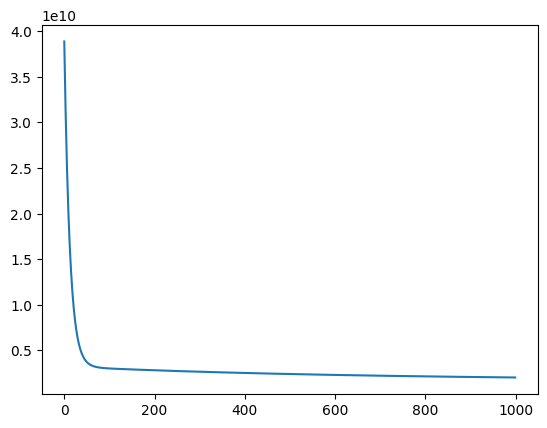

In [158]:
#Visualize loss
plt.plot(model.loss)
plt.show()

In [159]:
df_test['predict'] = predictions
df_test[['SalePrice', 'predict']]

,SalePrice,predict
0,154500,152219.869657
1,325000,266700.667152
2,115000,121623.456614
3,159000,173352.453802
4,315500,254970.819315
...,...,...
433,139000,145219.035690
434,126175,143536.242290
435,205950,218469.663138
436,110000,162550.788623


In [160]:
mae, rmse, r_square = metrics(predictions, y_test)
print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)
print("R square: ", r_square)

Mean Absolute Error:  30759.18955344654
Root Mean Square Error:  48967.63340379407
R square:  0.6563776292903232
